In [1]:
import pandas as pd
import numpy as np
import gmaps as gm
import datetime 
from sklearn import linear_model
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/melis/Downloads/res.csv", sep=",") #Leer el archivo
df["attributes.date_debut"] = [datetime.datetime.fromtimestamp(i /1000) for i in df["attributes.date_debut"]]
df["attributes.date_fin"] = [datetime.datetime.fromtimestamp(i /1000) for i in df["attributes.date_fin"]]

In [3]:
year = int(input("Year: "))
month = int(input("Month: "))
day = int(input("Day: "))
hour = int(input ("Hour: "))
date = datetime.datetime(year,month,day,hour)

Year: 2020
Month: 12
Day: 01
Hour: 16


In [4]:
df=df.loc[df['attributes.valeur']>=0] #Only positive values
df.reset_index(drop=True, inplace=True) #Reset index after removing the outliers

In [5]:
X = df.iloc[df.loc[(df["attributes.nom_poll"] == "PM10") & (df["attributes.date_debut"] == date)].index,[9,8]] #Matriz de x,y
X = np.array([ [X.iloc[i,0],X.iloc[i,1]] for i in range (len(X))] )
weights = df.iloc[df.loc[(df["attributes.nom_poll"] == "PM10") & (df["attributes.date_debut"] == date)].index,7]
Y = np.array(weights)

In [6]:
reg = linear_model.LinearRegression().fit(X,Y)

In [8]:
reg.score(X,Y)

0.009903172203372779

In [9]:
df=pd.concat( [pd.DataFrame(X, columns=['X1',"X2"]),pd.DataFrame(Y,columns=["Y"])],axis=1)
df

,X1,X2,Y
0,44.012900,1.375310,14.0
1,43.623600,1.438610,13.4
2,43.587300,1.444030,13.3
3,43.230300,0.062222,17.3
4,43.575700,1.418070,12.8
5,44.357000,2.570700,10.8
6,43.928100,2.146110,13.2
7,43.465600,1.329470,24.9
8,43.643100,1.467650,15.3
9,43.630300,0.179722,13.2


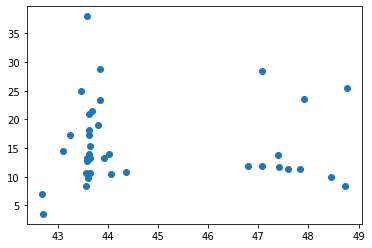

In [10]:
plt.scatter(df['X1'],df['Y'])

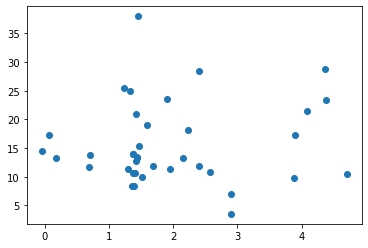

In [11]:
plt.scatter(df['X2'],df['Y'])